In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lattice import Triangular_Lattice
from walker import Graphene_Walker
import seaborn as sns
import random

%load_ext autoreload
%matplotlib inline

## Visualize Moire Potential

<a list of 396 text.Text objects>

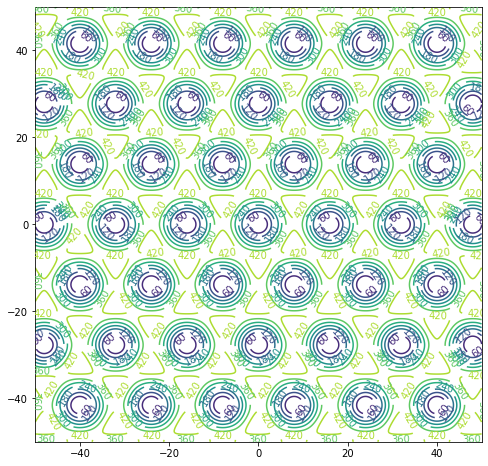

In [2]:
%autoreload 2
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

delta = 0.01
x = np.arange(-50, 50, delta)
y = np.arange(-50, 50, delta)
X, Y = np.meshgrid(x, y)
moire = Triangular_Lattice(16, 39.8) # 16nm lattice constant, 1eV energy amplitude
Z = moire.U(X, Y)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)

In [3]:
np.min(Z) * 0.086, np.max(Z) * 0.086

(0.0, 39.721593881511865)

## Figure 1

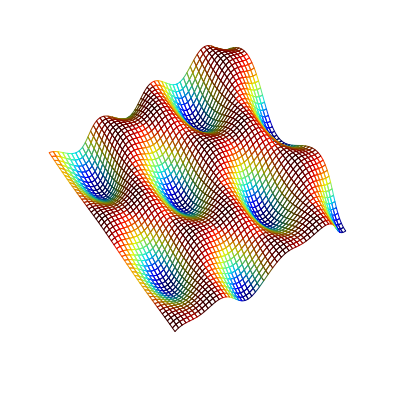

In [4]:
%autoreload 2
from matplotlib import cm
import seaborn as sns

delta = 0.005
x = np.arange(0, 28, delta)
y = np.arange(0, 48, delta)
X, Y = np.meshgrid(x, y)
lattice = Triangular_Lattice(16, 39.8)
Z = lattice.U(X, Y)

# Normalize the colors based on Z value
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.jet(norm(Z))


fig= plt.figure(figsize = (7,7))

ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, Z, facecolors=colors, shade=True)
surf.set_facecolor((0,0,0,0))


ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')

ax.view_init(80, -215)
# plt.savefig('./moire_jet.pdf',dpi=300)

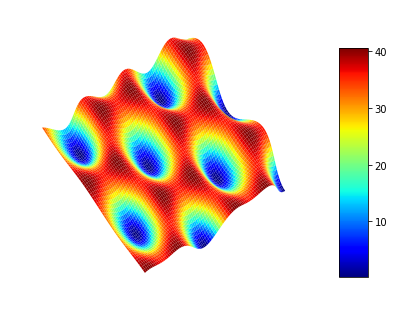

In [5]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig= plt.figure(figsize = (7,7))
delta = 0.5
x = np.arange(0, 28, delta)
y = np.arange(0, 48, delta)
X, Y = np.meshgrid(x, y)
lattice = Triangular_Lattice(16, 39.8)
Z = lattice.U(X, Y)*0.088
ax = plt.axes(projection='3d')
surfplot = ax.plot_surface(X, Y, Z, cmap="jet", lw=0.5, rstride=1, cstride=1, alpha=1, shade=True) #cmap="gist_heat_r"
surfplot.set_facecolor((0,0,0,0))
# ax.contour(X, Y, Z, 10, offset=-1, lw=3, colors="k", linestyles="solid", alpha=0.5)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')
cbar = plt.colorbar(surfplot, shrink=0.6 , aspect=8, ticks=[0, 10, 20, 30, 40])
# cbar.ax.set_yticklabels(['-40','-30','-20', '-10', '0'])  # vertically oriented colorbar
ax.view_init(80, -215)
plt.show()
# fig.savefig('./moire_jet_colorbar.pdf',dpi=300)

22 done
25 done
CPU times: user 2.43 s, sys: 772 ms, total: 3.2 s
Wall time: 2.22 s


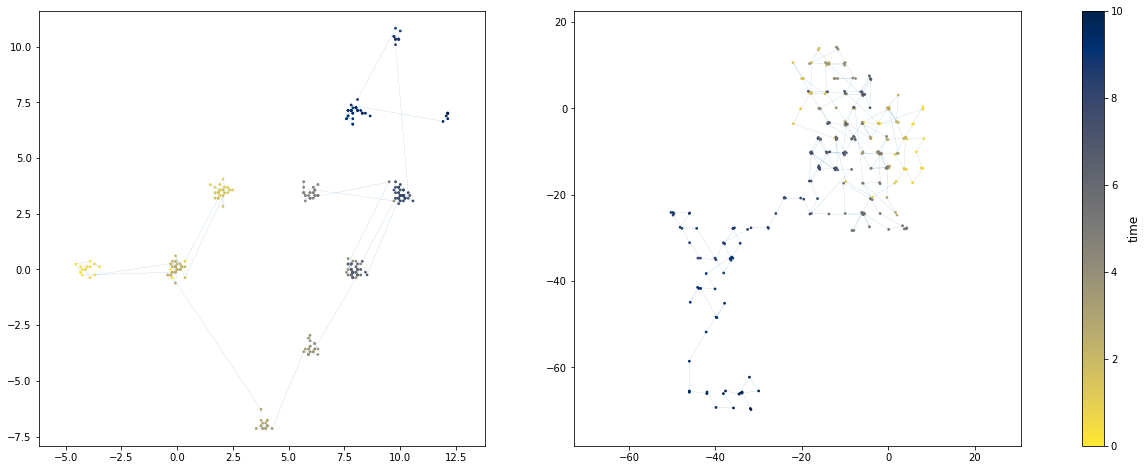

In [6]:
%%time
from lattice import Triangular_Lattice
from walker import Graphene_Walker
np.random.seed(123)
random.seed(123)
barrier = 39.8
lattice = 4
moire1 = Triangular_Lattice(lattice, barrier) # 16nm lattice constant, 1meV energy amplitude
walkers1 = Graphene_Walker(0.246, 22) # 2.46 Angstrom lattice, 10 Kelvin
tracks1 = walkers1.get_tracks(moire1, nsteps=300, njumps=100000, nparticles=1, endT=1e1)
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

tracks1 = tracks1[tracks1['particle'] == 0]
x, y, t = tracks1['x'], tracks1['y'], tracks1['time']
ax[0].plot(x,y,lw=.1, zorder=0)
tmax = t.max()
scat = ax[0].scatter(x, y, c=t, cmap = 'cividis_r', vmin=0, vmax=tmax,
                      s=3, zorder=1)

cbar = fig.colorbar(scat, ax=ax).set_label(label=r'time', fontsize=12)
# ax[0].set_xlim((-65,95))
# ax[0].set_ylim((-95,65))
ax[0].set_aspect('equal', 'datalim')
ax[0].margins(0.1)
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_aspect('equal')

moire2 = Triangular_Lattice(lattice, barrier) # 16nm lattice constant, 1meV energy amplitude
walkers2 = Graphene_Walker(0.246, 30) # 2.46 Angstrom lattice, 10 Kelvin
tracks2 = walkers2.get_tracks(moire2, nsteps=300, njumps=100000, nparticles=1, endT=1e1)

tracks2 = tracks2[tracks2['particle'] == 0]
x, y, t = tracks2['x'], tracks2['y'], tracks2['time']
ax[1].plot(x,y,lw=.1, zorder=0)
tmax = t.max()
scat = ax[1].scatter(x, y, c=t, cmap ='cividis_r', vmin=0, vmax=tmax,
                      s=3, zorder=1)
# ax[1].set_xlim((-65,95))
# ax[1].set_ylim((-95,65))
ax[1].set_aspect('equal', 'datalim')
ax[1].margins(0.1)
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_aspect('equal')
fig.savefig('sample_traj_{}meV.pdf'.format(barrier),dpi=200, bbox_inches='tight')
fig.savefig('sample_traj_{}meV.png'.format(barrier),dpi=300, bbox_inches='tight')

# Wait Time Tail

In [7]:
%%time
from tqdm import tqdm
from joblib import Parallel, delayed
from itertools import product


temps =[20, 22, 24, 26, 28]
lattice_constants = [16]
barrier = 39.8
nparticles = 100

kws = {
    'njumps' : 1000000, 
    'nparticles' : nparticles, 
    'init' : 1000000,
}

def euc_dist(a, b):
    return np.sqrt((a[:,0] - b[:,0])**2 + (a[:,1] - b[:,1])**2)

def get_waits(m_lattice, temperature, total_particles=1000, seed=1, **kws):
    random.seed(seed)
    np.random.seed(seed)
    moire = Triangular_Lattice(m_lattice, barrier) # 16nm lattice constant, 1meV energy amplitude
    walkers = Graphene_Walker(0.246, temperature) # 2.46 Angstrom lattice, 10 Kelvin
    tracks = walkers.walk(**kws)
    
    waits = walkers.get_waits(moire, tracks, **kws)
    return tracks, waits

result = Parallel(n_jobs=-1, prefer='threads')(delayed(get_waits)(m_lattice, temperature, **kws) for m_lattice, temperature in tqdm(product(lattice_constants, temps)))
print('done')
tracks, waits = get_waits(16, 32, **kws)



5it [00:00, 3369.46it/s]


done
CPU times: user 2min 37s, sys: 17 s, total: 2min 54s
Wall time: 1min 26s


/home/a/as/asai/dsgo/trading/trading/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'PDF')

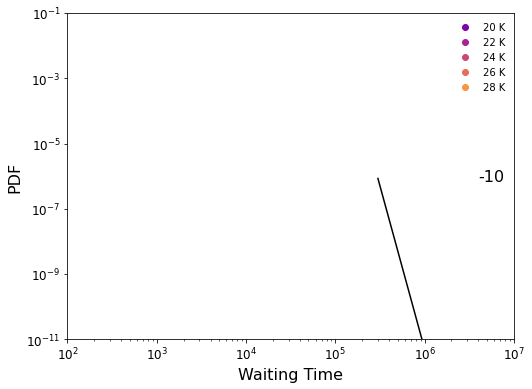

In [8]:
import scipy.stats
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
col = plt.cm.plasma(np.linspace(0.25, 0.75, len(temps)))
# waits = np.array(result).reshape((len(lattice_constants), len(temps), 50000050))
waits = np.array([x[1] for x in result]).reshape((len(lattice_constants), len(temps), 100000100))
for i, T in enumerate(temps):
    yy, xx = np.histogram(waits[0, i] , np.logspace(2, np.log10(1e6), 100), density=True)
    xmax = np.max(xx)
    ax.scatter(xx[1:-1], yy[1:], color=col[i], label='{} K'.format(T))



mu, loc = scipy.stats.expon.fit(waits[0, i])
best_fit_line = scipy.stats.expon.pdf(xx, mu, loc)
plt.plot(xx, best_fit_line,c='gray')

# xrng = np.linspace(1e3, 2e3, 100)
# ax.plot(xrng, 1e39*xrng**(-15), color='k')
xrange = np.linspace(3e5, 1.4e6, 100)
ax.plot(xrange, 0.5e49*xrange**(-10), color='k')

ax.set_ylim(1e-11, 1e-1)
ax.set_xlim(1e2, 1e7)


ax.text(0.95, 0.5,'-10', fontsize=16,
        horizontalalignment='center',
        verticalalignment='center',
        transform = ax.transAxes)
ax.legend(frameon=False)


plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
# plt.title('Wait Times Probability Density')
plt.xlabel('Waiting Time',fontsize=16)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.ylabel('PDF',fontsize=16)


## Waiting Time Tail Rework


In [82]:
%%time
from tqdm import tqdm
from joblib import Parallel, delayed
from itertools import product

def euc_dist(a, b):
    return np.sqrt((a[:,0] - b[:,0])**2 + (a[:,1] - b[:,1])**2)

def get_waits(m_lattice, temperature, total_particles=1000, seed=1, **kws):
    random.seed(seed)
    np.random.seed(seed)
    moire = Triangular_Lattice(m_lattice, barrier) # 16nm lattice constant, 1meV energy amplitude
    walkers = Graphene_Walker(0.246, temperature) # 2.46 Angstrom lattice, 10 Kelvin
    tracks = walkers.walk(**kws)
    
    waits = walkers.get_waits(moire, tracks, **kws)
    return tracks, waits

n_waits = 50000
temps =[20, 22, 24, 26, 28, 30]
lattice_constants = [16]
barrier = 39.8
nparticles = 100
seeds = list(range(100))

kws = {
    'njumps' : 1000000, 
    'nparticles' : nparticles, 
    'init' : 1000000,
}

modified_waits_all = np.array([[] for _ in range(len(temps) * len(lattice_constants))])

iteration = 0
while modified_waits_all.shape[-1] < n_waits:
    result = Parallel(n_jobs=-1, prefer='threads')(delayed(get_waits)(m_lattice, temperature, seed=seeds[iteration],**kws) for m_lattice, temperature in tqdm(product(lattice_constants, temps)))

    modified_waits_curr = []
    for i in range(len(lattice_constants)):
        for j in range(len(temps)):
            tracks = result[i*len(temps) + j][0]
            waits = result[i*len(temps) + j][1]

            waits_c = waits.cumsum(axis=1)
            origin = tracks[:,0]
            lattice = lattice_constants[i]
            curr_wait = np.zeros((nparticles))
            modified_waits = []

            for idx in range(len(waits[0])):
                position = tracks[:,idx]
                curr_wait += waits[:, idx]
                mask = (euc_dist(position, origin) > lattice).astype(int)

                waits_done = (mask * curr_wait)
                indices = waits_done.nonzero()[0]

                if len(indices) > 0:
                    modified_waits.extend(waits_done[indices])
                    position_mask = np.vstack([mask, mask]).T
                    origin = (origin * (1 - position_mask)) + (position_mask * position)
                    curr_wait = curr_wait * (1 - mask)

            modified_waits_curr.append(modified_waits)
    min_wait_times = min([len(x) for x in modified_waits_curr])
    modified_waits_curr = np.array([x[:min_wait_times] for x in modified_waits_curr])
    modified_waits_all = np.concatenate([modified_waits_all,modified_waits_curr],axis=1)
    iteration += 1                                                                                                
    

6it [00:00, 3784.90it/s]
6it [00:00, 2281.99it/s]
6it [00:00, 4358.47it/s]
6it [00:00, 2723.57it/s]
6it [00:00, 2938.22it/s]
6it [00:00, 3427.65it/s]
6it [00:00, 2387.88it/s]
6it [00:00, 2395.83it/s]
6it [00:00, 2191.57it/s]
6it [00:00, 2351.51it/s]
6it [00:00, 3178.71it/s]
6it [00:00, 3278.51it/s]


CPU times: user 1h 19min 19s, sys: 3min 45s, total: 1h 23min 5s
Wall time: 1h 10s


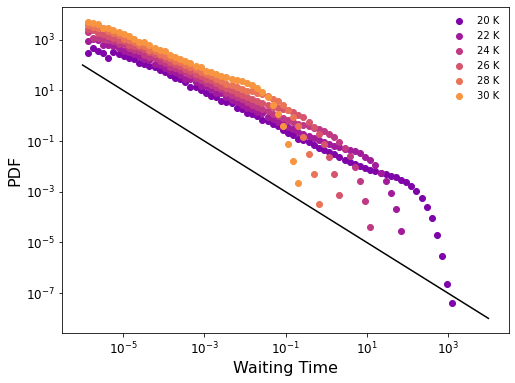

In [83]:
import scipy.stats
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
col = plt.cm.plasma(np.linspace(0.25, 0.75, len(temps)))
waits = np.array(modified_waits_all).reshape((len(lattice_constants), len(temps), modified_waits_all.shape[-1]))
bins = np.logspace(-6, 4, 80)
for i, T in enumerate(temps):
    yy, xx = np.histogram(waits[0, i] , bins, density=True)
    xmax = np.max(xx)
    ax.scatter(xx[1:-1], yy[1:], color=col[i], label='{} K'.format(T))
      
ax.legend(frameon=False)

ax.plot(bins, bins**(-1) * 1e-4, color='k')

plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
# plt.title('Wait Times Probability Density')
plt.xlabel('Waiting Time',fontsize=16)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.ylabel('PDF',fontsize=16)
fig.savefig('./waitingtime_dist.pdf', dpi=300, bbox_inches='tight')


## Distribution of Displacement

In [578]:
def plot_hist_dots(ax, x,y, xmin="", xmax="", title="", text="", log=False, color='gray',legend=""):


    dx1 = np.concatenate([np.diff(x),np.diff(y)])

    yy, xx = np.histogram(dx1, np.arange(-180 - 6, 6 + 180, 12), density=True)
    
#     mu, loc = scipy.stats.norm.fit(dx1)
#     best_fit_line = scipy.stats.norm.pdf(xx, mu, loc)
    
    
    xmax = np.max(xx[xx>0])
    xmin = np.min(xx[xx>0])

    ymin = np.min(yy[yy>0])
    ymax = np.max(yy[yy>0])
    
    xx = xx[:-1] + (xx[1] - xx[0])/2
    ax.scatter(xx, yy, c=color, marker='o', s=40,label=legend)
    ax.plot(xx, yy, c=color, linewidth=1)
#     ax.plot(xx, best_fit_line[1:],c='gray')
    ax.set_xlabel(r'Displacement',fontsize=16)
    ax.set_ylabel(r'PDF',fontsize=16)
    ax.margins(0.1)
    ax.set_ylim(ymin,ymax+3)
#     ax.set_xlim(1,10)
    ax.legend(frameon=False)

    if log:
        ax.set_yscale('log')
#         ax.set_xscale('log')
    return ax

20 done
22 done
24 done
26 done
28 done


0it [00:00, ?it/s]*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
1it [00:20, 20.10s/it]*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2it [00:40, 20.27s/it]*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for

CPU times: user 2min 15s, sys: 12.4 s, total: 2min 27s
Wall time: 14h 3min


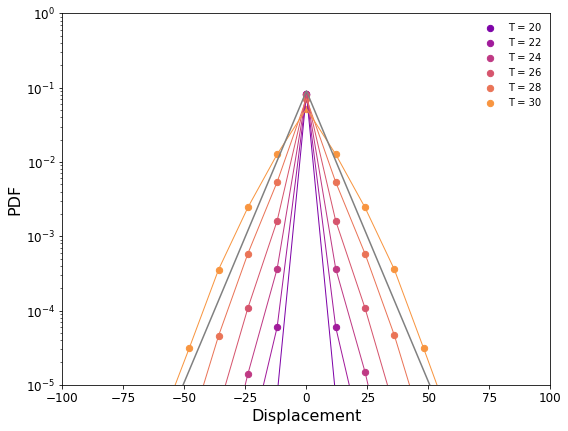

In [579]:
%%time
from tqdm import tqdm
from joblib import Parallel, delayed
from itertools import product
import seaborn as sns
import scipy.stats


temperatures = np.arange(20, 32, 2)
periodicity = [12]
barrier = 39.8
c = plt.cm.plasma(np.linspace(0.25, 0.75, len(temperatures)))
nsteps=300
def get_tracks(period, barrier, temperature):
    random.seed(1)
    np.random.seed(1)
    moire = Triangular_Lattice(period, barrier) # 16nm lattice constant, 1meV energy amplitude
    walkers = Graphene_Walker(0.246, temperature) # 2.46 Angstrom lattice, 10 Kelvin
    return walkers.get_tracks(moire, nsteps=10000, njumps=100000, nparticles=700, endT=1e2, init=10000000)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i,period in enumerate(periodicity):
    result = Parallel(n_jobs=-1)(delayed(get_tracks)(period, barrier, temperature) for temperature in temperatures) 
    for j,(tracks,temp) in tqdm(enumerate(zip(result, temperatures))):

       ## generate tracks at that temperature
        random.seed(1)
        np.random.seed(1)
        ## gather x and y values
        x = []
        y = []
        for particle in list(set(tracks['particle'])):
            x.append(np.array(tracks[tracks['particle'] == particle]['x']))
            y.append(np.array(tracks[tracks['particle'] == particle]['y']))
        x = np.array(x)
        y = np.array(y)
        title ='T = {:.0f}'.format(temp)
        ax = plot_hist_dots(ax, x,y,log=True, color=c[2*i+j], legend =title)
        if temp == temperatures[-1]:
            dx1 = np.concatenate([np.diff(x),np.diff(y)]).flatten()
            yy, xx = np.histogram(dx1, np.arange(-80, 80, 1), density=True)
            interp = np.arange(-80, 80, 1)
            mu, loc = scipy.stats.laplace.fit(dx1)
            best_fit_line =  scipy.stats.laplace.pdf(interp, mu, loc)
            ax.plot(interp, best_fit_line,c='gray')
        fig.tight_layout()
        ax.set_ylim(1e-5,1)
        ax.set_xlim(-100,100)
        plt.xticks(fontsize= 12)
        plt.yticks(fontsize= 12)
# fig.savefig('./displacement_dist_lin.pdf', dpi=300, bbox_inches='tight')

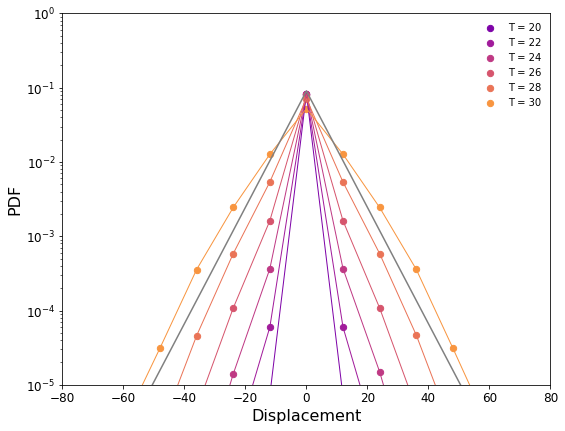

30 done


In [580]:
ax.set_xlim(-80, 80)
fig

# MSD

20 done
22 done
24 done
26 done
28 done
CPU times: user 21.3 s, sys: 5.02 s, total: 26.3 s
Wall time: 22h 45min 28s


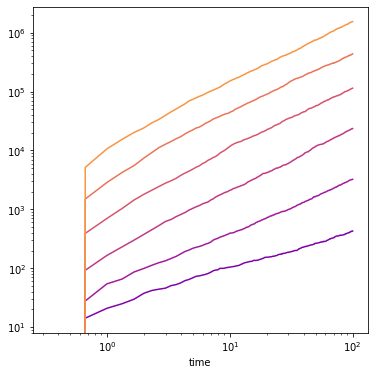

In [581]:
%%time
import pandas as pd
from tqdm import tqdm
from joblib import Parallel, delayed
from itertools import product
import seaborn as sns
import scipy.stats


temperatures = np.arange(20, 32, 2)
periodicity = [16]
barrier = 39.8
c = plt.cm.plasma(np.linspace(0.25, 0.75, len(temperatures)))
def get_tracks(period, barrier, temperature):
    random.seed(1)
    np.random.seed(1)
    moire = Triangular_Lattice(period, barrier) # 16nm lattice constant, 1meV energy amplitude
    walkers = Graphene_Walker(0.246, temperature) # 2.46 Angstrom lattice, 10 Kelvin
    return walkers.get_tracks(moire, nsteps=300, njumps=100000, nparticles=700, endT=1e2, init=1000000000)

def get_msd(df):
    df['msd'] = (df['x'] - df.iloc[0]['x'])**2 + (df['y'] - df.iloc[0]['y'])**2
    msd = df.groupby('time')['msd'].mean()
    return msd

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for i,period in enumerate(periodicity):
    result = Parallel(n_jobs=-1)(delayed(get_tracks)(period, barrier, temperature) for temperature in temperatures) 
for i, df in enumerate(result):
    msds = df.groupby('particle').apply(get_msd)
    msds.mean().plot(ax=ax, color=c[i])
ax.set_xscale('log')
ax.set_yscale('log')

(10.0, 3000000.0)

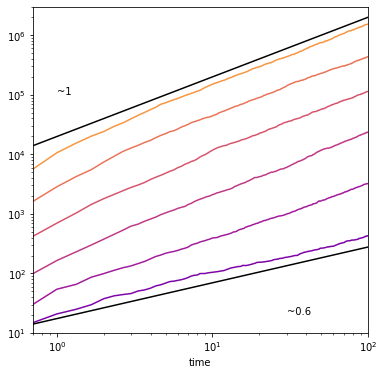

In [582]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for i, df in enumerate(result):
    msds = df.groupby('particle').apply(get_msd)
    msds.mean(axis=0).plot(ax=ax, color=c[i])
x = np.linspace(1e2 / 300, 1e2, 1000)
ax.plot(x, 2e4 * x, color='k')
ax.plot(x, 1.75e1 * x**0.6, color='k')
ax.text(1, 1e5, '~1')
ax.text(3e1, 2e1, '~0.6')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(7e-1, 1e2)
ax.set_ylim(1e1, 3e6)

In [583]:
%%time
import trackpy as tp
temperatures = [23]
periodicity = [4, 8, 12, 16]
barrier = 39.8
obs_times = np.logspace(1, 2, num=8)
c = plt.cm.plasma(np.linspace(0.25, 0.75, len(temperatures)))
def get_tracks(period, barrier, temperature, obs_time):
    random.seed(1)
    np.random.seed(1)
    # keep delta fixed to 1e5 so change nsteps
    nsteps = int(obs_time / (1e2 / 300))
    print(nsteps)
    moire = Triangular_Lattice(period, barrier) # 16nm lattice constant, 1meV energy amplitude
    walkers = Graphene_Walker(0.246, temperature) # 2.46 Angstrom lattice, 10 Kelvin
    return walkers.get_tracks(moire, nsteps=nsteps, njumps=100000, nparticles=1000, endT=obs_time, init=10000)

def get_ebp(df):
    frame_no = df.time.unique()
    df['frame'] = df['time'].map(lambda x : np.argwhere(x == frame_no)[0][0])
    im = tp.imsd(df, 1, 1) # get tmsds for individuals particles
    et_msd = im.mean(axis=1)
    xi = im.divide(et_msd, axis='index')
    return ((xi**2).mean(axis=1) - 1).iloc[0]

# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
results = []
for i,period in enumerate(periodicity):
    result = Parallel(n_jobs=-1)(delayed(get_tracks)(period, barrier, temperatures[0], obs_time) for obs_time in obs_times)
    results.append(result)

ebps = []
for result in results:
    ebp = Parallel(n_jobs=-1)(delayed(get_ebp)(df) for df in result)
    ebps.append(ebp)

30
23 done
30
23 done
30
23 done
41
23 done
41
23 done
41
23 done
57
23 done
80
23 done
57
23 done
80
23 done
57
23 done
80
23 done
111
23 done
111
23 done
111
23 done
155
23 done
155
23 done
155
23 done
30
23 done
215
23 done
215
23 done
215
23 done
41
23 done
300
23 done
300
23 done
300
23 done
57
23 done
80
23 done
111
23 done
155
23 done
CPU times: user 1.18 s, sys: 9.28 s, total: 10.5 s
Wall time: 33min 53s


Text(0, 0.5, 'EBP')

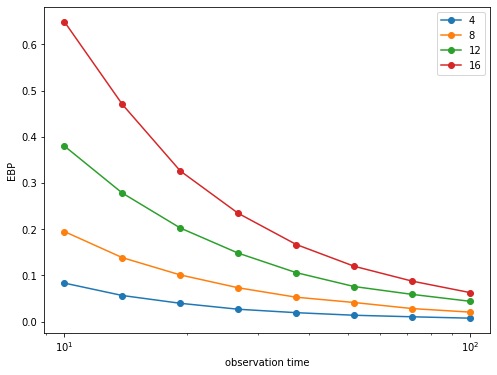

215
23 done
300
23 done


In [584]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for ebp,period in zip(ebps, periodicity):
    plt.plot(obs_times, ebp, '-o', label=f"{period}")
plt.legend()
ax.set_yscale('linear')
ax.set_xscale('log')
plt.xlabel('observation time')
plt.ylabel('EBP')

## Temperature Plots (figure 3)

Restart and run imports to have enough RAM for this section

In [569]:
%%time
from utils import *
from walker import Graphene_Walker
from joblib import Parallel, delayed
from tqdm import tqdm
import pdb

from tensorflow.keras.models import Sequential, load_model, Model

np.random.seed(0)
random.seed(0)

temperatures = np.arange(20, 30, 1)
periodicity = [4, 8, 12, 16]
barrier = 39.8
nsteps = 300

period_temp_activations = []
period_temp_predictions = []
period_temp_values = []
period_num_fbm = []
period_num_brownian = []
period_num_ctrw = []
avg_period_temp_values = []
std_period_temp_values = []
alpha_period_temp_values = []
astd_period_temp_values = []

fbm_alpha = net_file = load_model('models/{}-H-estimate.h5'.format(nsteps))
ctrw_alpha = net_file = load_model('models/model-alphaCTRW-estimate_{}.h5'.format(nsteps))
class_model = net_file = load_model( 'models/{}_new_model.h5'.format(nsteps))

def get_tracks(period, barrier, temperature):
    moire = Triangular_Lattice(period, barrier) # 16nm lattice constant, 1meV energy amplitude
    walkers = Graphene_Walker(0.246, temperature) # 2.46 Angstrom lattice, 10 Kelvin
    return walkers.get_tracks(moire, nsteps=nsteps, njumps=100000, nparticles=1000, endT=1e2)

for i, period in enumerate(periodicity):
    all_temp_activations = []
    all_temp_predictions = []
    all_temp_values = []
    avg_all_temp_values = []
    std_all_temp_values = []
    alpha_all_temp_values = []
    astd_all_temp_values = []
    num_fbm = []
    num_brownian = []
    num_ctrw = []
    result = Parallel(n_jobs=-1)(delayed(get_tracks)(period, barrier, temperature) for temperature in temperatures)
    for tracks in tqdm(result):

        ## gather x and y values
        x = []
        y = []
        for particle in list(set(tracks['particle'])):
            if not tracks[tracks['particle'] == particle][['x', 'y']].isna().any().any(): # check for nans
                x.append(np.array(tracks[tracks['particle'] == particle]['x']))
                y.append(np.array(tracks[tracks['particle'] == particle]['y']))
        x = np.array(x)
        y = np.array(y)

        ## calculate dx and y
        temp_x = x-np.mean(x)
        temp_dx = np.diff(temp_x)
        temp_dx = temp_dx/np.std(temp_dx)
        ## trim x and y to shape
        temp_dx = temp_dx[:,::int(temp_dx.shape[1] / nsteps)][:,:-1]

        temp_values, temp_predictions = classification_on_real(temp_dx, steps=nsteps, model=class_model) #values is the probability value, prediction is the predicted class (0,1,2)

        alphas = alpha_on_real(temp_dx, temp_predictions, fbm_alpha, ctrw_alpha, steps=nsteps)
        
        all_temp_activations.append(get_activations(temp_dx, steps=nsteps))

        num_fbm.append(sum([1 for idx, x in temp_predictions if x == 0]))
        num_brownian.append(sum([1 for idx, x in temp_predictions if x == 1]))
        num_ctrw.append(sum([1 for idx, x in temp_predictions if x == 2]))
        
        avg_temp_values = np.mean(temp_values, axis=0) #average probability over all particles from that temp and period
        std_temp_values = np.std(temp_values, axis=0) #std of probability over all particles from that temp and period
        alpha_temp_values = np.mean(alphas, axis=0) #average alpha over all particles from that temp and period
        astd_temp_values = np.std(alphas) #std of alpha over all particles from that temp and period

        all_temp_predictions.append(temp_predictions)
        all_temp_values.append(temp_values)
        avg_all_temp_values.append(avg_temp_values)
        std_all_temp_values.append(std_temp_values)
        alpha_all_temp_values.append(alpha_temp_values)
        astd_all_temp_values.append(astd_temp_values)
        

    period_temp_activations.append(all_temp_activations)
    period_temp_predictions.append(all_temp_predictions)
    period_temp_values.append(all_temp_values)
    period_num_fbm.append(num_fbm)
    period_num_brownian.append(num_brownian)
    period_num_ctrw.append(num_ctrw)
    avg_period_temp_values.append(avg_all_temp_values)
    std_period_temp_values.append(std_all_temp_values)
    alpha_period_temp_values.append(alpha_all_temp_values)
    astd_period_temp_values.append(astd_all_temp_values)

all_temp_activations = np.array(all_temp_activations)

22 done
23 done
24 done
25 done
26 done
27 done
20 done
28 done


 10%|████▎                                      | 1/10 [03:34<32:13, 214.83s/it]

21 done
29 done


 20%|████████▌                                  | 2/10 [07:01<28:01, 210.14s/it]/home/a/as/asai/dsgo/trading/trading/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
100%|██████████████████████████████████████████| 10/10 [25:15<00:00, 151.54s/it]


22 done
23 done
24 done
25 done
26 done
27 done
20 done
28 done


 10%|████▎                                      | 1/10 [03:05<27:53, 185.98s/it]

21 done
29 done


100%|██████████████████████████████████████████| 10/10 [27:37<00:00, 165.76s/it]


22 done
23 done
24 done
25 done
26 done
27 done
20 done
28 done


 10%|████▎                                      | 1/10 [03:31<31:41, 211.26s/it]

21 done
29 done


100%|██████████████████████████████████████████| 10/10 [27:01<00:00, 162.12s/it]


22 done
23 done
24 done
25 done
26 done
27 done
20 done
28 done


 10%|████▎                                      | 1/10 [03:33<32:04, 213.88s/it]

21 done
29 done


100%|██████████████████████████████████████████| 10/10 [28:15<00:00, 169.53s/it]

CPU times: user 2h 1min 34s, sys: 5min 48s, total: 2h 7min 23s
Wall time: 1d 23h 11min 53s


In [574]:
mtx = np.asarray(avg_period_temp_values)
err = np.asarray(std_period_temp_values)
amtx = np.asarray(alpha_period_temp_values)
aerr = np.asarray(astd_period_temp_values)

(-0.1, 1.1)

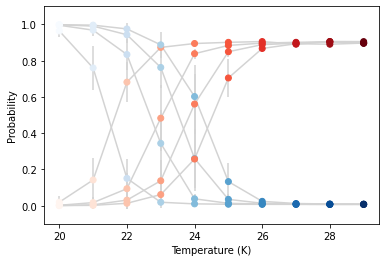

In [575]:
for ind,per in enumerate(periodicity[0:4]):
    x = temperatures
    plt.errorbar(x,mtx[ind,:,2],err[ind,:,2],c='lightgray',zorder=0)
    plt.errorbar(x,mtx[ind,:,1],err[ind,:,2],c='lightgray',zorder=0)
    plt.scatter(x,mtx[ind,:,2],c=x,cmap=plt.cm.Blues,label='ctrw probability')
    plt.scatter(x,mtx[ind,:,1],c=x,cmap=plt.cm.Reds,label='Brownian probability')
plt.xlabel("Temperature (K)")
plt.ylabel("Probability")
plt.ylim((-0.1,1.1))
# plt.legend()
# plt.savefig('./probabilityvaluesMoNet-400part_19-8barrier_300steps_endTscaled.png', dpi=300, bbox_inches='tight')

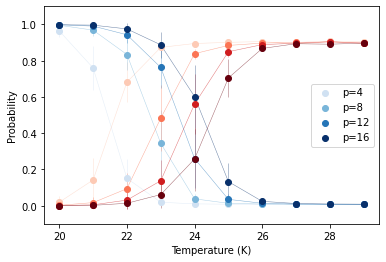

In [576]:
import matplotlib.pylab as pl
colors_ctrw = pl.cm.Blues(np.linspace(0.2,1,4))
colors_brown = pl.cm.Reds(np.linspace(0.2,1,4))
for ind,per in enumerate(periodicity):
    x = temperatures
    label_p = 'p='+str(per)
    plt.errorbar(x,mtx[ind,:,2],err[ind,:,2],color=colors_ctrw[ind],zorder=0,linewidth=0.5,alpha=0.6)
    plt.errorbar(x,mtx[ind,:,1],err[ind,:,2],color=colors_brown[ind],zorder=0,linewidth=0.5,alpha=0.6)
    plt.scatter(x,mtx[ind,:,2],color=colors_ctrw[ind], label=label_p)
    plt.scatter(x,mtx[ind,:,1],color=colors_brown[ind])
plt.xlabel("Temperature (K)")
plt.ylabel("Probability")
plt.ylim((-0.1,1.1))
plt.legend()
plt.savefig('./probabilityvaluesMoNet-400part_{:.2f}barrier_300steps_endTscaled.png'.format(barrier), dpi=300, bbox_inches='tight')

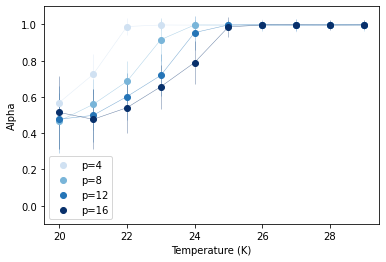

In [577]:
import matplotlib.pylab as pl
colors_ctrw = pl.cm.Blues(np.linspace(0.2,1,4))
for ind,per in enumerate(periodicity):
    x = temperatures
    label_p = 'p='+str(per)
    plt.errorbar(x,amtx[ind,:, 0],aerr[ind,:],color=colors_ctrw[ind],zorder=0,linewidth=0.5,alpha=0.6)
    plt.scatter(x,amtx[ind,:, 0],color=colors_ctrw[ind], label=label_p)
plt.xlabel("Temperature (K)")
plt.ylabel("Alpha")
plt.ylim((-0.1,1.1))
plt.legend()
plt.savefig('./alphavaluesMoNet-400part_{:.2f}barrier_300steps_endTscaled.png'.format(barrier), dpi=300, bbox_inches='tight')

## UMap (restart the notebook before running this section, names are repeated from previpus section)

In [600]:
%autoreload 2
from utils import *
from walker import Graphene_Walker
import random
from joblib import Parallel, delayed

In [172]:
%%time
from utils import *
from walker import Graphene_Walker
from joblib import Parallel, delayed
from tqdm import tqdm
import pdb

from tensorflow.keras.models import Sequential, load_model, Model

np.random.seed(1)
random.seed(1)

temperatures = [22, 23, 24]
periodicity = [12]
barrier = 39.8
nsteps = 300

period_temp_activations = []
period_temp_predictions = []
period_temp_values = []
period_num_fbm = []
period_num_brownian = []
period_num_ctrw = []
avg_period_temp_values = []
std_period_temp_values = []
alpha_period_temp_values = []
astd_period_temp_values = []

fbm_alpha = net_file = load_model('models/{}-H-estimate.h5'.format(nsteps))
ctrw_alpha = net_file = load_model('models/model-alphaCTRW-estimate_{}.h5'.format(nsteps))
class_model = net_file = load_model( 'models/{}_new_model.h5'.format(nsteps))

def get_tracks(period, barrier, temperature):
    moire = Triangular_Lattice(period, barrier) # 16nm lattice constant, 1meV energy amplitude
    walkers = Graphene_Walker(0.246, temperature) # 2.46 Angstrom lattice, 10 Kelvin
    return walkers.get_tracks(moire, nsteps=nsteps, njumps=100000, nparticles=1000, endT=1e2)

for i, period in enumerate(periodicity):
    all_temp_activations = []
    all_temp_predictions = []
    all_temp_values = []
    avg_all_temp_values = []
    std_all_temp_values = []
    alpha_all_temp_values = []
    astd_all_temp_values = []
    num_fbm = []
    num_brownian = []
    num_ctrw = []
    result = Parallel(n_jobs=-1)(delayed(get_tracks)(period, barrier, temperature) for temperature in temperatures)
    for tracks in tqdm(result):

        ## gather x and y values
        x = []
        y = []
        for particle in list(set(tracks['particle'])):
            if not tracks[tracks['particle'] == particle][['x', 'y']].isna().any().any(): # check for nans
                x.append(np.array(tracks[tracks['particle'] == particle]['x']))
                y.append(np.array(tracks[tracks['particle'] == particle]['y']))
        x = np.array(x)
        y = np.array(y)

        ## calculate dx and y
        temp_x = x-np.mean(x)
        temp_dx = np.diff(temp_x)
        temp_dx = temp_dx/np.std(temp_dx)
        ## trim x and y to shape
        temp_dx = temp_dx[:,::int(temp_dx.shape[1] / nsteps)][:,:-1]

        temp_values, temp_predictions = classification_on_real(temp_dx, steps=nsteps, model=class_model) #values is the probability value, prediction is the predicted class (0,1,2)

        alphas = alpha_on_real(temp_dx, temp_predictions, fbm_alpha, ctrw_alpha, steps=nsteps)
        
        all_temp_activations.append(get_activations(temp_dx, steps=nsteps))

        num_fbm.append(sum([1 for idx, x in temp_predictions if x == 0]))
        num_brownian.append(sum([1 for idx, x in temp_predictions if x == 1]))
        num_ctrw.append(sum([1 for idx, x in temp_predictions if x == 2]))
        
        avg_temp_values = np.mean(temp_values, axis=0) #average probability over all particles from that temp and period
        std_temp_values = np.std(temp_values, axis=0) #std of probability over all particles from that temp and period
        alpha_temp_values = np.mean(alphas, axis=0) #average alpha over all particles from that temp and period
        astd_temp_values = np.std(alphas) #std of alpha over all particles from that temp and period

        all_temp_predictions.append(temp_predictions)
        all_temp_values.append(temp_values)
        avg_all_temp_values.append(avg_temp_values)
        std_all_temp_values.append(std_temp_values)
        alpha_all_temp_values.append(alpha_temp_values)
        astd_all_temp_values.append(astd_temp_values)
        

    period_temp_activations.append(all_temp_activations)
    period_temp_predictions.append(all_temp_predictions)
    period_temp_values.append(all_temp_values)
    period_num_fbm.append(num_fbm)
    period_num_brownian.append(num_brownian)
    period_num_ctrw.append(num_ctrw)
    avg_period_temp_values.append(avg_all_temp_values)
    std_period_temp_values.append(std_all_temp_values)
    alpha_period_temp_values.append(alpha_all_temp_values)
    astd_period_temp_values.append(astd_all_temp_values)

all_temp_activations = np.array(all_temp_activations)

22 done
23 done


 33%|██████████████▋                             | 1/3 [03:36<07:12, 216.24s/it]

24 done


 67%|█████████████████████████████▎              | 2/3 [07:07<03:33, 213.49s/it]/home/a/as/asai/dsgo/trading/trading/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
100%|████████████████████████████████████████████| 3/3 [09:54<00:00, 198.09s/it]

CPU times: user 10min 50s, sys: 28.7 s, total: 11min 19s
Wall time: 30min 13s


In [173]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

def manifold(dx, predictions, s=30, ax=None, markers = ["o",">","s"], colors="tab:blue", fbm_coeffs=None, ctrw_alphas=None, embedding_name="umap"):
    if embedding_name == "tsne":
        embedded_dx = TSNE(init="pca", random_state=0).fit_transform(dx)
    elif embedding_name == 'umap':
        print(dx.shape)
        state = 16
        num_temps = dx.shape[0]
        dx_scaled = np.concatenate([StandardScaler().fit_transform(x) for x in dx], axis = 0)

        random.seed(5)
        np.random.seed(5)
        embedded_dx = UMAP(random_state=state).fit_transform(dx_scaled)
        
        interval_size = len(embedded_dx) // num_temps
        fbm_points = [np.array([x for idx, x in enumerate(embedded_dx[i * interval_size: (i + 1) * interval_size]) 
                                if predictions[idx + i * interval_size][1] == 0]) for i in range(num_temps)]
        brownian_points = [np.array([x for idx, x in enumerate(embedded_dx[i * interval_size: (i + 1) * interval_size]) 
                                if predictions[idx + i * interval_size][1] == 1]) for i in range(num_temps)]
        ctrw_points = [np.array([x for idx, x in enumerate(embedded_dx[i * interval_size: (i + 1) * interval_size]) 
                                if predictions[idx + i * interval_size][1] == 2]) for i in range(num_temps)]
        
        fbm = None
        ctrw = None
        brownian = None
        plt_list = []
        plt_names = []
        if ax is None:
            ax = plt.axes()
            ax.figure.set_size_inches(8,6)
        
        for i in range(num_temps):
            if len(fbm_points[i]) != 0:
                fbm = ax.scatter(fbm_points[i][:,0], fbm_points[i][:,1], s=s, c=colors[i],marker=markers[0], alpha=0.5, edgecolor=None)
#                 plt_names.append("fbm")
                
            if len(ctrw_points[i]) != 0:
                ctrw = ax.scatter(ctrw_points[i][:,0], ctrw_points[i][:,1], s=s, c=colors[i], marker=markers[0], alpha=0.5, edgecolor=None)
                if i == 0:
                    temps = [20, 27, 34]
                    plt_list.append(ctrw)
                    plt_names.append(f"{temps[i]}K")
#                 plt_names.append("ctrw")
        
            if len(brownian_points[i]) != 0:
                temps = [20, 27, 34]
                print(len(brownian_points[i]))
                brownian = ax.scatter(brownian_points[i][:,0], brownian_points[i][:,1], s=s, c=colors[i], marker=markers[0], alpha=0.5, edgecolor=None)
                plt_list.append(brownian)
                plt_names.append(f"{temps[i]}K")
#                 plt_names.append("brownian")

#         plt_list.append(fbm)
#         plt_names.append("fbm")
        
#         plt_list.append(ctrw)
#         plt_names.append("ctrw")
        
#         plt_list.append(brownian)
#         plt_names.append("brownian")

        plt.legend(plt_list, plt_names, frameon=False)
#         plt.xticks([-5,0,5,10],fontsize= 12)
#         plt.yticks([0,5,10],fontsize= 12)
        plt.xticks([])
        plt.yticks([])
#         ax.set_xlabel('UMAP 1', fontsize=16)
#         ax.set_ylabel('UMAP 2', fontsize=16)
        plt.savefig("UMAP_temp.pdf", dpi=300, bbox_inches='tight')
        
        return ctrw, ax
    else:
        raise NotImplementedError


(3, 1000, 128)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

14
772


(<matplotlib.collections.PathCollection at 0x7fdbb65ba320>, <AxesSubplot:>)

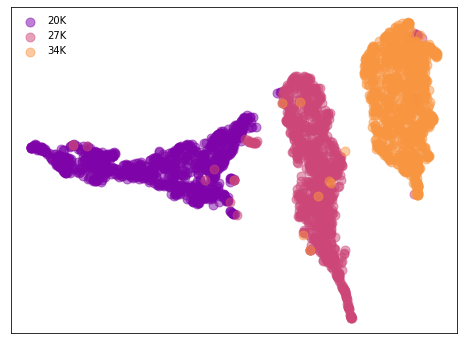

In [174]:
import seaborn as sns
marker_size = 80
colors = plt.cm.plasma(np.linspace(0.25, 0.75, 3))

manifold(np.array(period_temp_activations[0])[:].squeeze(), np.concatenate(period_temp_predictions[0][:]), s = marker_size, colors=colors)

In [175]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

def manifold2(dx, predictions, s=30, ax=None, markers = ["o",">","s"], colors="tab:blue", fbm_coeffs=None, ctrw_alphas=None, embedding_name="umap"):
    if embedding_name == "tsne":
        embedded_dx = TSNE(init="pca", random_state=0).fit_transform(dx)
    elif embedding_name == 'umap':
        num_temps = dx.shape[0]
        state = 16
        random.seed(5)
        np.random.seed(5)
        dx_scaled = np.concatenate([StandardScaler().fit_transform(x) for x in dx], axis = 0)
        embedded_dx = UMAP(random_state=state).fit_transform(dx_scaled)
        
        interval_size = len(embedded_dx) // num_temps
        fbm_points = [np.array([x for idx, x in enumerate(embedded_dx[i * interval_size: (i + 1) * interval_size]) 
                                if predictions[idx + i * interval_size][1] == 0]) for i in range(num_temps)]
        ctrw_points = [np.array([x for idx, x in enumerate(embedded_dx[i * interval_size: (i + 1) * interval_size]) 
                                if predictions[idx + i * interval_size][1] == 2]) for i in range(num_temps)]
        brownian_points = [np.array([x for idx, x in enumerate(embedded_dx[i * interval_size: (i + 1) * interval_size]) 
                                if predictions[idx + i * interval_size][1] == 1]) for i in range(num_temps)]

        fbm = None
        ctrw = None
        brownian = None
        plt_list = []
        plt_names = []
        if ax is None:
            ax = plt.axes()
            ax.figure.set_size_inches(8,6)
        
        for i in range(num_temps):
#             if len(fbm_points[i]) != 0:
#             fbm = ax.scatter(fbm_points[i][:,0], fbm_points[i][:,1], s=s, c=colors[2], alpha=0.5, marker=markers[0], edgecolors=None)
            
            if len(ctrw_points[i]) != 0:
                ctrw = ax.scatter(ctrw_points[i][:,0], ctrw_points[i][:,1], s=s, c=colors[0], alpha = 0.7, marker=markers[0], edgecolors=None) #, label = "CTRW"
        
            if len(brownian_points[i]) != 0:
                brownian = ax.scatter(brownian_points[i][:,0], brownian_points[i][:,1], s=s, c=colors[1], alpha=0.7, marker=markers[0],edgecolors=None) #, label ="Brownian"

#         plt_list.append(fbm)
#         plt_names.append("FBM")
        
        plt_list.append(ctrw)
        plt_names.append("CTRW")
        
        plt_list.append(brownian)
        plt_names.append("Brownian")
        
        plt.legend(plt_list, plt_names, frameon=False)
#         plt.xticks([-5,0,5,10],fontsize= 12)
#         plt.yticks([0,5,10],fontsize= 12)
        plt.xticks([])
        plt.yticks([])
#         ax.set_xlabel('UMAP 1', fontsize=16)
#         ax.set_ylabel('UMAP 2', fontsize=16)
        plt.box('off')
        plt.savefig("UMAP_class.pdf", dpi=300, bbox_inches='tight')
        return ctrw, ax
    else:
        raise NotImplementedError



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

(<matplotlib.collections.PathCollection at 0x7fd9dff04b70>, <AxesSubplot:>)

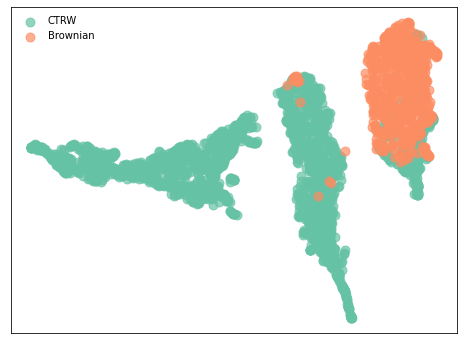

In [176]:
import seaborn as sns
marker_size = 80
colors = sns.color_palette("Set2",3)

manifold2(np.array(period_temp_activations[0])[:].squeeze(), np.concatenate(period_temp_predictions[0][:]), s = marker_size, colors=colors)



In [166]:
all_data = [period_temp_activations, period_temp_predictions, period_temp_values, period_num_fbm, period_num_brownian,
            period_num_ctrw, avg_period_temp_values, std_period_temp_values, alpha_period_temp_values, astd_period_temp_values]

In [145]:
import pickle
with open("all_data.pkl", "wb") as f:
    pickle.dump(all_data, f)